In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd

df = pd.read_csv("nuclear/data.csv")

In [2]:
df_2d= df.drop(columns = ['AP', 'RH', "PE"])
# df_2d = df.drop(columns = ['z'])


In [3]:
df_2d = preprocessing.scale(df_2d)
# df_2d = preprocessing.scale(df_2d)

In [4]:
import matplotlib.pyplot as plt

# df_2d = df_2d[:10000,]

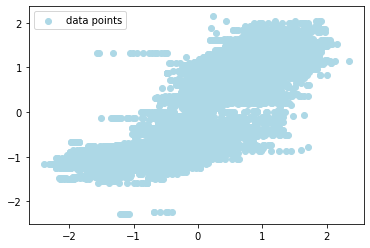

In [5]:

# df_2d=  df_2d[:10000,]
fig,ax = plt.subplots(1)


x = df_2d[:,0]
y = df_2d[:,1]

ax.scatter(x, y, color='lightblue', label='data points')
ax.legend(loc='upper left')


In [6]:
num_elements = 2000
minX = min(x)
maxX = max(x)
Q1 = np.random.uniform(minX, maxX, num_elements)

minY = min(y)
maxY = max(y)
Q2 = np.random.uniform(minY, maxY, num_elements)
# fig2 = plt.figure()
# ax2 = fig2.add_subplot()
# plt.plot(Q1, Q2, 'o', c="red")
# plt.show()

In [7]:
# L is half the length of the rectangle
maxSize  =max(maxX, maxY)
L = np.random.uniform(maxSize/2, size = 2000)


In [8]:
query_lst = []
for Q1_, Q2_, L_ in zip(Q1, Q2, L):
    query = [Q1_, Q2_, L_, L_]
    query_lst.append(query)

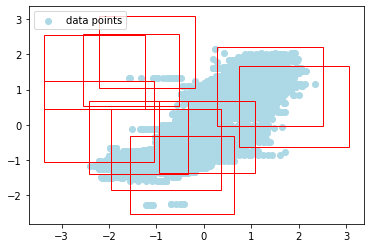

In [9]:
import matplotlib.patches as patches

fig,ax = plt.subplots(1)
# x = df_2d[:,0]
# y = df_2d[:,1]

ax.scatter(x, y, color='lightblue', label='data points')
ax.legend(loc='upper left')


for query in query_lst [:10]:
    # Leftmost point of square
    x,y = query[0] - query[2], query[1] - query[3]
    # Assumes Square
    length = query[3] * 2

    rect = patches.Rectangle((x,y),length, length, edgecolor='r', fill=False, zorder=2, label = "query range")
    # currentAxis = plt.gca()
    ax.add_patch(rect)


plt.show()


In [10]:
def inRange (Q, X1, X2):
    Q1 = Q[0]
    Q2 = Q[1]
    L1 = Q[2]
    L2 = Q[3]

    if (Q1 - L1 <= X1 and X1 <= Q1 +L1) and (Q2 - L2 <= X2 and X2 <= Q2 +L2):
        return True
    return False

In [11]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
def getResults(query_lst, X1, X2):
    results = []
    for _Q in query_lst:
        count = 0
        valid_X1_lst =[]
        valid_X2_lst =[]
        df = []
        for _X1, _X2 in zip(X1, X2):
            if inRange(_Q, _X1, _X2):
                count+=1
                valid_X1_lst.append(_X1)
                valid_X2_lst.append(_X2)
                df.append([_X1, _X2])
        
        if count >=2:
            Q_dict = {
                'query': _Q, 
                'count': count,
                "x1_avr": np.mean(valid_X1_lst), 
                "x2_avr": np.mean(valid_X2_lst), 
                'pearson': pearsonr(valid_X1_lst, valid_X2_lst)[0],
                'X1_reg_coef':  LinearRegression().fit(df,valid_X1_lst).coef_,
                'X2_reg_coef':  LinearRegression().fit(df,valid_X2_lst).coef_
            }
        else: 
             Q_dict = {
                'query': _Q, 
                'count': count,
                "x1_avr": np.mean(valid_X1_lst), 
                "x2_avr": np.mean(valid_X2_lst), 
            }

        results.append(Q_dict)
    return results

    

In [12]:

test = getResults(query_lst, x ,y)


TypeError: 'numpy.float64' object is not iterable